## Pregunta 1: Ofertas Relámpago

En conjunto con el desafío te compartimos un archivo llamado ofertas_relampago.csv el cual posee información de los resultados de ofertas del tipo relampago para un periodo de tiempo y un país determinado.

Es decir, son ofertas que tienen una duración definida de algunas horas y un porcentaje de unidades (stock) comprometidas.
El objetivo de este desafío es hacer un EDA sobre estos datos buscando insights sobre este tipo de ofertas.

Las columnas del dataset son autoexplicativas pero puedes preguntarnos cualquier duda.

In [1]:
# Libraries
import sys
import numpy as np 
import pandas as pd
import seaborn as sns
import missingno as msno
import scipy.stats as stats
from matplotlib import pyplot as plt 
# Pandas config
pd.options.mode.chained_assignment = None  # default='warn'
pd.set_option('display.max_rows', None)


In [5]:
# Parameters
NAME_FILE = "ofertas_relampago.csv"
FILES_PATH = '../Files/'

In [6]:
# Open csv file and view it
df = pd.read_csv(FILES_PATH+NAME_FILE)
# For convenience, I will change the column names to lowercase.
print("Number of rows:",str(df.shape[0]))
print("Number of columns:",str(df.shape[1]))
df.columns = df.columns.str.lower()
df.head()

Number of rows: 48746
Number of columns: 13


,offer_start_date,offer_start_dttm,offer_finish_dttm,offer_type,involved_stock,remaining_stock_after_end,sold_amount,sold_quantity,origin,shipping_payment_type,dom_domain_agg1,vertical,domain_id
0,2021-06-22,2021-06-22 16:00:00+00:00,2021-06-22 23:02:43+00:00,lightning_deal,4,-2,4.72,6.0,A,none,PETS FOOD,CPG,MLM-BIRD_FOODS
1,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 19:00:02+00:00,lightning_deal,5,5,NaN,NaN,NaN,free_shipping,PET PRODUCTS,OTHERS,MLM-ANIMAL_AND_PET_PRODUCTS
2,2021-06-22,2021-06-22 07:00:00+00:00,2021-06-22 13:00:01+00:00,lightning_deal,15,12,10.73,3.0,NaN,none,COMPUTERS,CE,MLM-SPEAKERS
3,2021-06-22,2021-06-22 19:00:00+00:00,2021-06-23 01:36:12+00:00,lightning_deal,15,13,7.03,2.0,NaN,none,COMPUTERS,CE,MLM-HEADPHONES
4,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 15:48:12+00:00,lightning_deal,15,0,39.65,15.0,NaN,none,COMPUTERS,CE,MLM-HEADPHONES


In [6]:
# What types of columns do we have
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48746 entries, 0 to 48745
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   offer_start_date           48746 non-null  object 
 1   offer_start_dttm           48746 non-null  object 
 2   offer_finish_dttm          48746 non-null  object 
 3   offer_type                 48746 non-null  object 
 4   involved_stock             48746 non-null  int64  
 5   remaining_stock_after_end  48746 non-null  int64  
 6   sold_amount                24579 non-null  float64
 7   sold_quantity              24579 non-null  float64
 8   origin                     11316 non-null  object 
 9   shipping_payment_type      48746 non-null  object 
 10  dom_domain_agg1            48746 non-null  object 
 11  vertical                   48746 non-null  object 
 12  domain_id                  48746 non-null  object 
dtypes: float64(2), int64(2), object(9)
memory usag

We note that the columns related to dates do not have datetime format.

In [7]:
# Change format to datetime
df['offer_start_date'] = pd.to_datetime(df['offer_start_date'])
df['offer_start_dttm'] = pd.to_datetime(df['offer_start_dttm'])
df['offer_finish_dttm'] = pd.to_datetime(df['offer_finish_dttm'])

<AxesSubplot:>

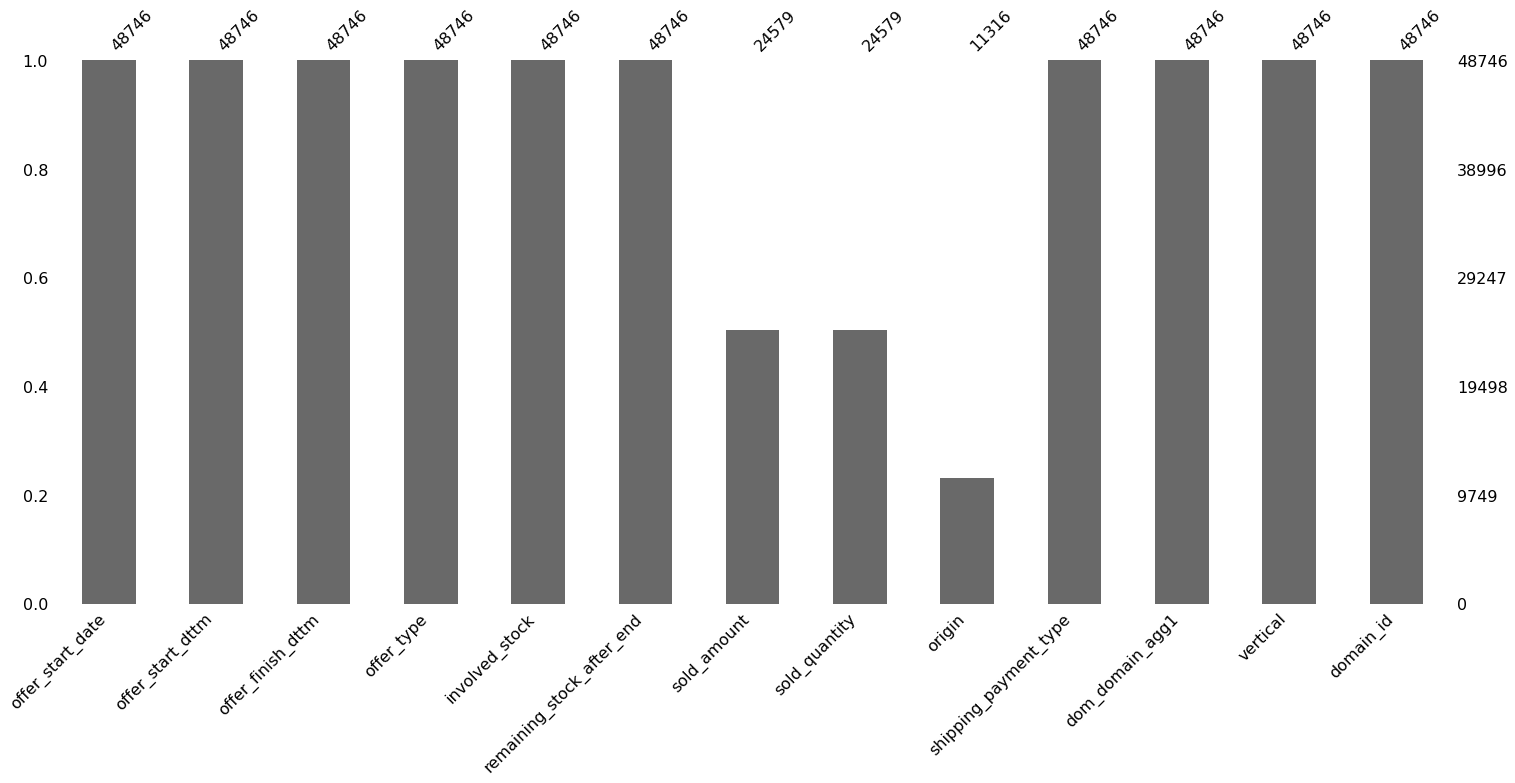

In [8]:
# Check missing values
msno.bar(df) # This barplot will indicates us how complete that column is. Where 1.0 (left y-axis) is 100% complete.

In [9]:
# Percentage missing values
(df.isna().sum()/df.shape[0]).sort_values(ascending=False)

origin                       0.767858
sold_amount                  0.495774
sold_quantity                0.495774
offer_start_date             0.000000
offer_start_dttm             0.000000
offer_finish_dttm            0.000000
offer_type                   0.000000
involved_stock               0.000000
remaining_stock_after_end    0.000000
shipping_payment_type        0.000000
dom_domain_agg1              0.000000
vertical                     0.000000
domain_id                    0.000000
dtype: float64

We observe that only 3 columns present null values, these are Sold Amount (~50% Null), Sold Quantity (~50% Null) and Origin (~77% Null).

### Categorical columns

In [11]:
# Auxiliary function Categorical columns. Table and Graph
def categorical_columns(dataframe: pd.DataFrame, column_name: str) -> pd.DataFrame:
    """Create a barplot with a categorical column and show a table of frequencies.

    Args:
        dataframe (pd.DataFrame): Dataframe with the information.
        column_name (str): Name of the categorical column.

    Returns:
        counts (pd.DataFrame): Dataframe with the frequencies of the categorical column.
    """
    # Count the ocurrences of each category. Calculate percentages.
    counts = dataframe[column_name].value_counts().reset_index()
    # Change name of columns
    counts.columns = [column_name, 'Count']
    # Calculate percentage
    counts['Percentage'] = counts['Count']/len(dataframe) * 100
    # Sort categories in descending order
    counts = counts.sort_values('Count', ascending = False)
    # Generate colors for the bar chart
    n_categories = len(counts)
    colors = plt.cm.Set3(np.linspace(0, 1, n_categories))

    # Plot a bar chart. Categories with percentages
    plt.figure(figsize=(8, 6))
    plt.bar(counts[column_name], counts['Percentage'], color = colors)
    plt.xlabel(column_name)
    plt.ylabel('Percentage')
    plt.title(f'Distribution of {column_name}')
    plt.xticks(rotation=90)
    plt.show()

    return counts

In [12]:
# Describe of categorical columns
df.select_dtypes(include=['object']).describe()

,offer_type,origin,shipping_payment_type,dom_domain_agg1,vertical,domain_id
count,48746,11316,48746,48746,48746,48746
unique,1,1,2,36,9,1266
top,lightning_deal,A,free_shipping,HOME&DECOR,APP & SPORTS,MLM-SURGICAL_AND_INDUSTRIAL_MASKS
freq,48746,11316,26658,6742,13241,1759


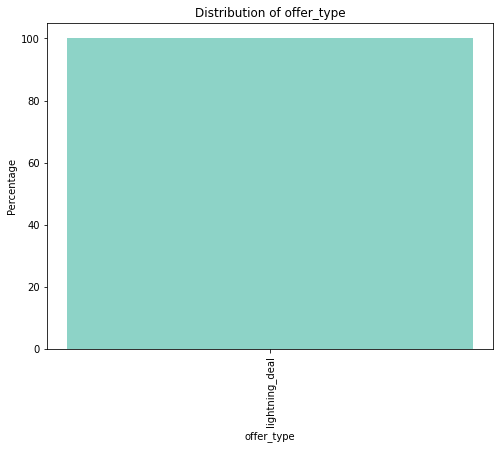

       offer_type  Count  Percentage
0  lightning_deal  48746       100.0


In [13]:
# offer_type
offer_type = categorical_columns(df, 'offer_type')
print(offer_type)


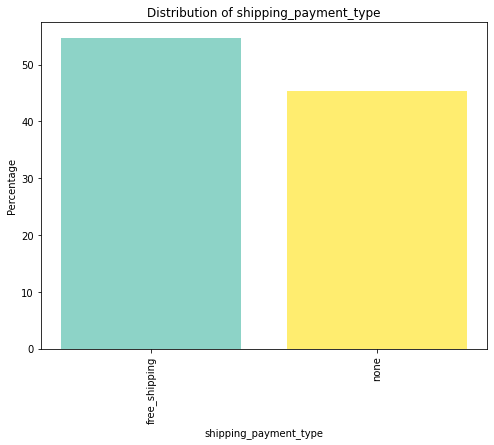

  shipping_payment_type  Count  Percentage
0         free_shipping  26658   54.687564
1                  none  22088   45.312436


In [14]:
# shipping_payment_type
shipping_payment_type = categorical_columns(df, 'shipping_payment_type')
print(shipping_payment_type)

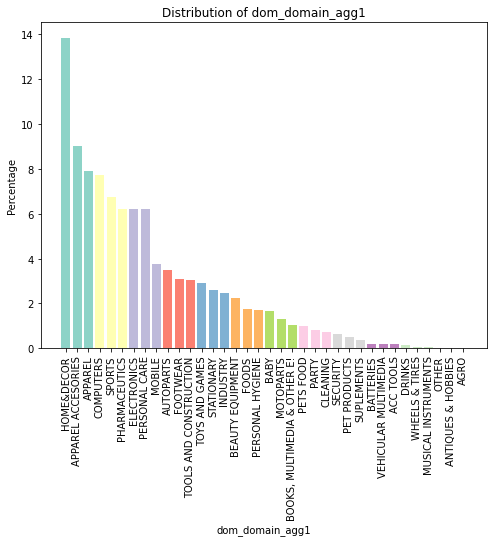

                 dom_domain_agg1  Count  Percentage
0                     HOME&DECOR   6742   13.830878
1             APPAREL ACCESORIES   4387    8.999713
2                        APPAREL   3856    7.910393
3                      COMPUTERS   3770    7.733968
4                         SPORTS   3289    6.747220
5                  PHARMACEUTICS   3035    6.226152
6                    ELECTRONICS   3018    6.191277
7                  PERSONAL CARE   3016    6.187174
8                         MOBILE   1841    3.776720
9                      AUTOPARTS   1696    3.479260
10                      FOOTWEAR   1516    3.109999
11        TOOLS AND CONSTRUCTION   1491    3.058713
12                TOYS AND GAMES   1426    2.925368
13                    STATIONARY   1259    2.582776
14                      INDUSTRY   1199    2.459689
15              BEAUTY EQUIPMENT   1099    2.254544
16                         FOODS    858    1.760144
17              PERSONAL HYGIENE    840    1.723218
18          

In [15]:
# dom_domain_agg1
dom_domain_agg1 = categorical_columns(df, 'dom_domain_agg1')
print(dom_domain_agg1)

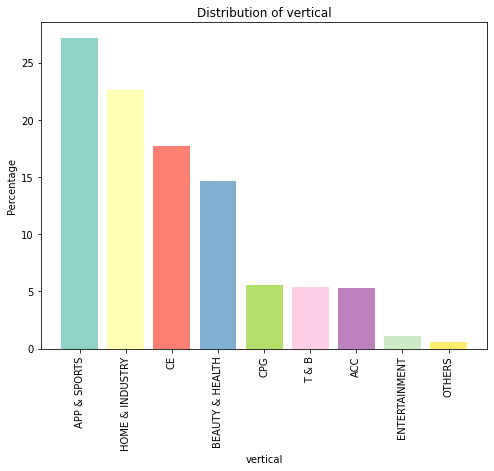

          vertical  Count  Percentage
0     APP & SPORTS  13241   27.163254
1  HOME & INDUSTRY  11011   22.588520
2               CE   8629   17.701965
3  BEAUTY & HEALTH   7150   14.667870
4              CPG   2714    5.567636
5            T & B   2624    5.383006
6              ACC   2573    5.278382
7    ENTERTAINMENT    525    1.077011
8           OTHERS    279    0.572355


In [16]:
# vertical
vertical = categorical_columns(df, 'vertical')
print(vertical)

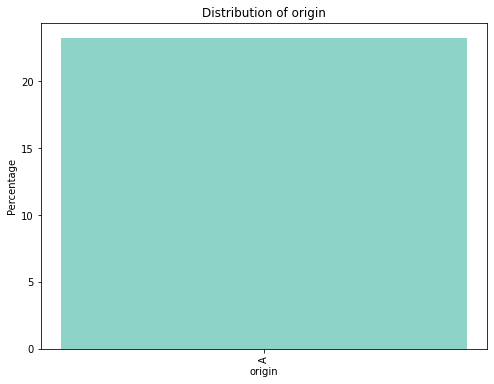

  origin  Count  Percentage
0      A  11316   23.214212


In [17]:
# origin
origin = categorical_columns(df, 'origin')
print(origin)

### Numerical columns

In [19]:
# Describe of numerical columns
df.select_dtypes(include=['float64', 'int']).describe()


,involved_stock,remaining_stock_after_end,sold_amount,sold_quantity
count,48746.000000,48746.000000,24579.000000,24579.000000
mean,35.007508,30.565216,51.208898,10.851052
std,206.761058,195.813806,175.254414,45.475305
min,1.000000,-192.000000,0.280000,1.000000
25%,5.000000,4.000000,5.730000,1.000000
50%,10.000000,8.000000,12.420000,3.000000
75%,15.000000,15.000000,30.925000,6.000000
max,9000.000000,8635.000000,4836.570000,1646.000000


In [7]:
# Auxiliary function Categorical columns. Table and Graph
def analyze_numerical_column(dataframe: pd.DataFrame, column_name:str) -> pd.DataFrame:
    """Create and histogram of a numerical column with the information of the describe of the column.

    Args:
        dataframe (pd.DataFrame): Dataframe where the data is stored.
        column_name (str): Name of the numerical column.

    Returns:
        column_stats (pd.DataFrame): Describe of the numerical column
    """
    # Generate descriptive statistics for the numerical column
    column_stats = dataframe[column_name].describe()
    # Plot a histogram of the column's distribution
    plt.figure(figsize=(10, 6))
    plt.hist(dataframe[column_name], bins='auto', edgecolor='black')
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {column_name}')
    plt.show()

    return column_stats

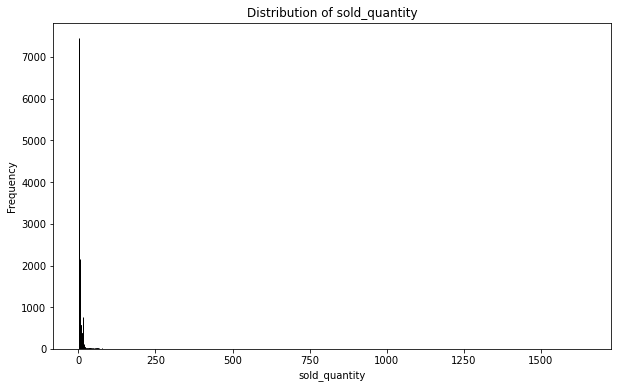

count    24579.000000
mean        10.851052
std         45.475305
min          1.000000
25%          1.000000
50%          3.000000
75%          6.000000
max       1646.000000
Name: sold_quantity, dtype: float64


In [8]:
# Sold quantity
sold_quantity = analyze_numerical_column(df, 'sold_quantity')
print(sold_quantity)

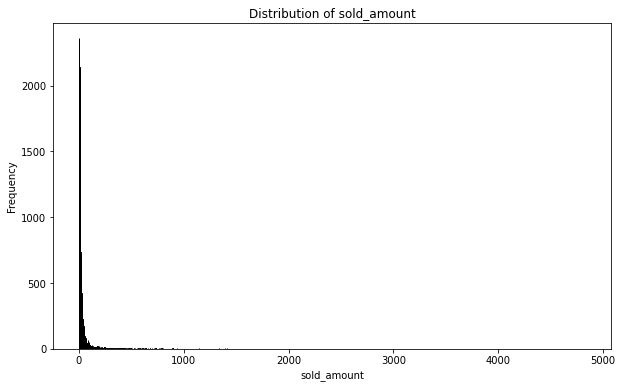

count    24579.000000
mean        51.208898
std        175.254414
min          0.280000
25%          5.730000
50%         12.420000
75%         30.925000
max       4836.570000
Name: sold_amount, dtype: float64


In [22]:
# Sold amount
sold_amount = analyze_numerical_column(df, 'sold_amount')
print(sold_amount)

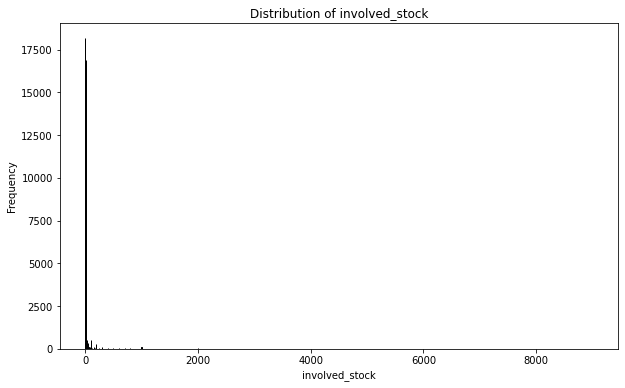

count    48746.000000
mean        35.007508
std        206.761058
min          1.000000
25%          5.000000
50%         10.000000
75%         15.000000
max       9000.000000
Name: involved_stock, dtype: float64


In [23]:
# involved_stock
involved_stock = analyze_numerical_column(df, 'involved_stock')
print(involved_stock)

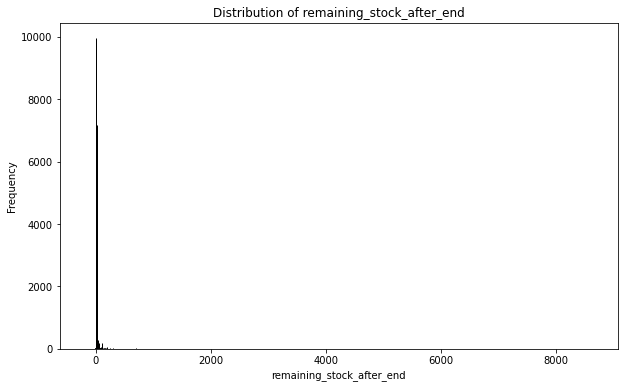

count    48746.000000
mean        30.565216
std        195.813806
min       -192.000000
25%          4.000000
50%          8.000000
75%         15.000000
max       8635.000000
Name: remaining_stock_after_end, dtype: float64


In [24]:
# remaining_stock_after_end
remaining_stock_after_end = analyze_numerical_column(df, 'remaining_stock_after_end')
print(remaining_stock_after_end)

### Explore and get insights

In [25]:
# Change order of columns to facilitate reading of dataframe
order_columns = ['offer_start_date', 'offer_start_dttm', 'offer_finish_dttm','domain_id', 'vertical', 'dom_domain_agg1', 'shipping_payment_type', 'origin', 
         'involved_stock', 'remaining_stock_after_end', 'sold_amount', 'sold_quantity']
df = df[order_columns]
# Create a binary column to indicate whether a sale was made
df.loc[:, 'is_sale'] = pd.notnull(df['sold_quantity']).astype(int)

In [26]:
# Which verticals are selling more?
verticals = df.groupby('vertical').agg(
    count = ('vertical', 'size'),
    is_sale_made = ('is_sale', 'mean'))
verticals['not_sale_made'] = 1 - verticals['is_sale_made']
verticals = verticals.round(2).reset_index()
verticals = verticals.sort_values('is_sale_made', ascending=False)
verticals

,vertical,count,is_sale_made,not_sale_made
2,BEAUTY & HEALTH,7150,0.62,0.38
3,CE,8629,0.52,0.48
0,ACC,2573,0.51,0.49
1,APP & SPORTS,13241,0.50,0.50
6,HOME & INDUSTRY,11011,0.49,0.51
4,CPG,2714,0.44,0.56
7,OTHERS,279,0.43,0.57
5,ENTERTAINMENT,525,0.34,0.66
8,T & B,2624,0.30,0.70


We note that the verticals that sell the most are: BEAUTY & HEALTH, CE and ACC.
While those that sell the least are: ENTERTAINMENT and T & B.	

In [27]:
# And if we check by vertical and domain?
verticals_domains = df.groupby(['vertical', 'dom_domain_agg1']).agg(
    count = ('dom_domain_agg1', 'size'),
    is_sale_made = ('is_sale', 'mean'))
verticals_domains['not_sale_made'] = 1 - verticals_domains['is_sale_made']
verticals_domains = verticals_domains.round(2).reset_index()
verticals_domains = verticals_domains.sort_values('is_sale_made', ascending=False)
verticals_domains

,vertical,dom_domain_agg1,count,is_sale_made,not_sale_made
13,BEAUTY & HEALTH,PHARMACEUTICS,3035,0.73,0.27
11,BEAUTY & HEALTH,BEAUTY EQUIPMENT,1099,0.63,0.37
30,OTHERS,ANTIQUES & HOBBIES,5,0.60,0.40
27,HOME & INDUSTRY,SECURITY,320,0.60,0.40
10,APP & SPORTS,SUPLEMENTS,193,0.60,0.40
0,ACC,ACC TOOLS,95,0.59,0.41
16,CE,MOBILE,1841,0.57,0.43
14,CE,COMPUTERS,3770,0.56,0.44
4,ACC,VEHICULAR MULTIMEDIA,104,0.54,0.46
2,ACC,AUTOPARTS,1696,0.53,0.47


We see that the most favored domains for sales are PHARMACEUTICS, BEAUTY EQUIPMENT, technological devices such as MOBILE and COMPUTER, as well as automotive products.

In [28]:
# Does it convert more to have free shipping?
shipping = df.groupby('shipping_payment_type').agg(count=('shipping_payment_type', 'size'),
                                                is_sale_made=('is_sale', 'mean'))
shipping['not_sale_made'] = 1 - shipping['is_sale_made']
shipping = shipping.round(2).reset_index()
shipping

,shipping_payment_type,count,is_sale_made,not_sale_made
0,free_shipping,26658,0.44,0.56
1,none,22088,0.58,0.42


Counter-intuitively, adding free shipping does not, at first glance, convert as many sales as not having shipping. Here we need to do a deeper review and see if this changes within any particular vertical or domain.

In [29]:
# What happens if we check by vertical?
shipping_vertical = df.groupby(['vertical', 'shipping_payment_type']).agg(
    count=('shipping_payment_type', 'size'),
    is_sale_made=('is_sale', 'mean'))
shipping_vertical['not_sale_made'] = 1 - shipping_vertical['is_sale_made']
shipping_vertical = shipping_vertical.round(2).reset_index()
shipping_vertical

,vertical,shipping_payment_type,count,is_sale_made,not_sale_made
0,ACC,free_shipping,1449,0.41,0.59
1,ACC,none,1124,0.63,0.37
2,APP & SPORTS,free_shipping,7656,0.44,0.56
3,APP & SPORTS,none,5585,0.59,0.41
4,BEAUTY & HEALTH,free_shipping,2982,0.54,0.46
5,BEAUTY & HEALTH,none,4168,0.68,0.32
6,CE,free_shipping,5382,0.48,0.52
7,CE,none,3247,0.61,0.39
8,CPG,free_shipping,1193,0.40,0.60
9,CPG,none,1521,0.48,0.52


In spite of the above review, it can be seen that in the Entertainment vertical there is a difference between offering free shipping or not. Although, these data are few, so perhaps their impact is not high.

In [30]:
# What happens if we check by vertical and domain?
shipping_vertical_domain = df.groupby(['vertical','dom_domain_agg1', 'shipping_payment_type']).agg(
    count=('shipping_payment_type', 'size'),
    is_sale_made=('is_sale', 'mean'))
shipping_vertical_domain['not_sale_made'] = 1 - shipping_vertical_domain['is_sale_made']
shipping_vertical_domain = shipping_vertical_domain.round(2).reset_index()
shipping_vertical_domain

,vertical,dom_domain_agg1,shipping_payment_type,count,is_sale_made,not_sale_made
0,ACC,ACC TOOLS,free_shipping,49,0.49,0.51
1,ACC,ACC TOOLS,none,46,0.70,0.30
2,ACC,AGRO,free_shipping,1,0.00,1.00
3,ACC,AUTOPARTS,free_shipping,856,0.42,0.58
4,ACC,AUTOPARTS,none,840,0.65,0.35
5,ACC,MOTOPARTS,free_shipping,413,0.38,0.62
6,ACC,MOTOPARTS,none,228,0.57,0.43
7,ACC,VEHICULAR MULTIMEDIA,free_shipping,94,0.54,0.46
8,ACC,VEHICULAR MULTIMEDIA,none,10,0.50,0.50
9,ACC,WHEELS & TIRES,free_shipping,36,0.28,0.72


A more careful review, only in "VEHICULAR MULTIMEDIA" and "SUPLEMENTS" shows that there is a difference in offering this type of incentive. So a priori, incurring the subsidy of this incentive is not favorable.

We will now review what happens with the sales information.

In [31]:
# Is there any relationship between the day of the week of the offer and sales dominance?
df['day_of_week'] = df['offer_start_date'].dt.day_name()
df.head()


,offer_start_date,offer_start_dttm,offer_finish_dttm,domain_id,vertical,dom_domain_agg1,shipping_payment_type,origin,involved_stock,remaining_stock_after_end,sold_amount,sold_quantity,is_sale,day_of_week
0,2021-06-22,2021-06-22 16:00:00+00:00,2021-06-22 23:02:43+00:00,MLM-BIRD_FOODS,CPG,PETS FOOD,none,A,4,-2,4.72,6.0,1,Tuesday
1,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 19:00:02+00:00,MLM-ANIMAL_AND_PET_PRODUCTS,OTHERS,PET PRODUCTS,free_shipping,NaN,5,5,NaN,NaN,0,Tuesday
2,2021-06-22,2021-06-22 07:00:00+00:00,2021-06-22 13:00:01+00:00,MLM-SPEAKERS,CE,COMPUTERS,none,NaN,15,12,10.73,3.0,1,Tuesday
3,2021-06-22,2021-06-22 19:00:00+00:00,2021-06-23 01:36:12+00:00,MLM-HEADPHONES,CE,COMPUTERS,none,NaN,15,13,7.03,2.0,1,Tuesday
4,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 15:48:12+00:00,MLM-HEADPHONES,CE,COMPUTERS,none,NaN,15,0,39.65,15.0,1,Tuesday


In [32]:
# Check if exists a relationship between day of week and domain in sales.
domain_day = df.groupby(['dom_domain_agg1', 'day_of_week']).agg(
    count=('day_of_week', 'size'),
    is_sale_made=('is_sale', 'mean'))
domain_day['not_sale_made'] = 1 - domain_day['is_sale_made']
domain_day = domain_day.round(2).reset_index()
domain_day = domain_day.sort_values(['dom_domain_agg1', 'is_sale_made'], ascending=[False, False])
domain_day

,dom_domain_agg1,day_of_week,count,is_sale_made,not_sale_made
234,WHEELS & TIRES,Friday,6,0.67,0.33
240,WHEELS & TIRES,Wednesday,3,0.33,0.67
239,WHEELS & TIRES,Tuesday,8,0.25,0.75
238,WHEELS & TIRES,Thursday,9,0.22,0.78
237,WHEELS & TIRES,Sunday,5,0.20,0.80
235,WHEELS & TIRES,Monday,2,0.00,1.00
236,WHEELS & TIRES,Saturday,3,0.00,1.00
228,VEHICULAR MULTIMEDIA,Monday,13,0.85,0.15
227,VEHICULAR MULTIMEDIA,Friday,13,0.62,0.38
232,VEHICULAR MULTIMEDIA,Tuesday,24,0.62,0.38


It seems to be important to release the offers taking into consideration the type of product to be sold and the day of the week in which this will be done, since depending on the product the conversion into sales tends to be different. For example, party-related items tend to convert more on days close to the weekend. While, for example, food or personal hygiene related items tend to convert earlier in the week.

Check the inventory and review in which the required stock was not met.

In [33]:
# Create a binary column to indicate whether a sale was made
df['negative_stock'] = df['remaining_stock_after_end'].apply(lambda x: 1 if x < 0 else 0)
df.head()

,offer_start_date,offer_start_dttm,offer_finish_dttm,domain_id,vertical,dom_domain_agg1,shipping_payment_type,origin,involved_stock,remaining_stock_after_end,sold_amount,sold_quantity,is_sale,day_of_week,negative_stock
0,2021-06-22,2021-06-22 16:00:00+00:00,2021-06-22 23:02:43+00:00,MLM-BIRD_FOODS,CPG,PETS FOOD,none,A,4,-2,4.72,6.0,1,Tuesday,1
1,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 19:00:02+00:00,MLM-ANIMAL_AND_PET_PRODUCTS,OTHERS,PET PRODUCTS,free_shipping,NaN,5,5,NaN,NaN,0,Tuesday,0
2,2021-06-22,2021-06-22 07:00:00+00:00,2021-06-22 13:00:01+00:00,MLM-SPEAKERS,CE,COMPUTERS,none,NaN,15,12,10.73,3.0,1,Tuesday,0
3,2021-06-22,2021-06-22 19:00:00+00:00,2021-06-23 01:36:12+00:00,MLM-HEADPHONES,CE,COMPUTERS,none,NaN,15,13,7.03,2.0,1,Tuesday,0
4,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 15:48:12+00:00,MLM-HEADPHONES,CE,COMPUTERS,none,NaN,15,0,39.65,15.0,1,Tuesday,0


In [34]:
# What is the percentage of negative stock in the dataset?
negative_stock = df.groupby(['negative_stock']).agg(
    count=('negative_stock', 'size'))
negative_stock['n_rows'] = df.shape[0]
negative_stock['Percentage'] =100*negative_stock['count']/negative_stock['n_rows']
negative_stock = negative_stock.round(2).reset_index()
negative_stock


,negative_stock,count,n_rows,Percentage
0,0,47473,48746,97.39
1,1,1273,48746,2.61


Only a ~3% of the offers do not achieved the inventory required.

In [35]:
# Filter only negative stock rows and check if exists a vertical o domain where this have a big impact.
negative_stock_df = df[df['negative_stock'] == 1]
# Count
negative_stock_df_count = negative_stock_df.groupby(['vertical','dom_domain_agg1']).agg(
    count=('dom_domain_agg1', 'size'))
negative_stock_df_count['N_rows'] = negative_stock_df.shape[0]
negative_stock_df_count['Percentage'] = 100 * negative_stock_df_count['count']/negative_stock_df_count['N_rows']
negative_stock_df_count = negative_stock_df_count.round(2).reset_index()
negative_stock_df_count = negative_stock_df_count.sort_values(['Percentage'], ascending=[False])
negative_stock_df_count

,vertical,dom_domain_agg1,count,N_rows,Percentage
20,HOME & INDUSTRY,HOME&DECOR,254,1273,19.95
10,BEAUTY & HEALTH,PHARMACEUTICS,175,1273,13.75
11,CE,COMPUTERS,135,1273,10.60
7,APP & SPORTS,SPORTS,115,1273,9.03
9,BEAUTY & HEALTH,PERSONAL CARE,83,1273,6.52
1,ACC,AUTOPARTS,76,1273,5.97
19,CPG,PETS FOOD,57,1273,4.48
5,APP & SPORTS,APPAREL ACCESORIES,50,1273,3.93
4,APP & SPORTS,APPAREL,43,1273,3.38
8,BEAUTY & HEALTH,BEAUTY EQUIPMENT,39,1273,3.06


We note that almost the half of the negative stock records is concentred in three domains: HOME&DECOR, PHARMACEUTICS y COMPUTERS. As we reviewed above, that domains have a bigger concentration of sales made than the others. So, it's important to re checked the offers that'll be made to customers and use a better inventory management system to reach the demand. We do not want to lose sales because of an empty inventory.

In [36]:
# Last, we need to review the sales amount earned from each sale.
money_vertical_domain = df.groupby(['vertical', 'dom_domain_agg1']).agg(
    count = ('dom_domain_agg1', 'size'),
    sold_amount = ('sold_amount', 'sum'))
money_vertical_domain = money_vertical_domain.sort_values(['sold_amount'], ascending=[False])
money_vertical_domain = money_vertical_domain.reset_index()
money_vertical_domain['Total Money'] = money_vertical_domain['sold_amount'].sum()
money_vertical_domain['Percentage'] = (100 * money_vertical_domain['sold_amount']/money_vertical_domain['Total Money']).round(2)
money_vertical_domain

,vertical,dom_domain_agg1,count,sold_amount,Total Money,Percentage
0,BEAUTY & HEALTH,PHARMACEUTICS,3035,440216.74,1258663.5,34.97
1,CE,MOBILE,1841,158992.21,1258663.5,12.63
2,CE,ELECTRONICS,3018,119853.95,1258663.5,9.52
3,BEAUTY & HEALTH,BEAUTY EQUIPMENT,1099,88830.25,1258663.5,7.06
4,HOME & INDUSTRY,HOME&DECOR,6742,87761.65,1258663.5,6.97
5,CE,COMPUTERS,3770,83941.78,1258663.5,6.67
6,APP & SPORTS,APPAREL,3856,36569.90,1258663.5,2.91
7,APP & SPORTS,APPAREL ACCESORIES,4387,36565.63,1258663.5,2.91
8,APP & SPORTS,SPORTS,3289,33118.70,1258663.5,2.63
9,HOME & INDUSTRY,INDUSTRY,1199,25874.22,1258663.5,2.06


We noticed that certain domains are the ones that concentrate the highest amount of sales. For example, PHARMACEUTICS focuses approximately 35% of the money earned by these offers. But, despite what we reviewed above, this domain also concentrates the highest amount of inventory breaks. This reinforces the idea that when generating these offers, it is essential to consider an estimated prediction of the inventory needed when these incentives are released to customers.